Warning message:
"VALE3.SA contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"Removed 30 rows containing non-finite values (stat_bin)."Warning message:
"Removed 30 rows containing non-finite values (stat_density)."Warning message:
"Removed 20 rows containing missing values (geom_bar)."

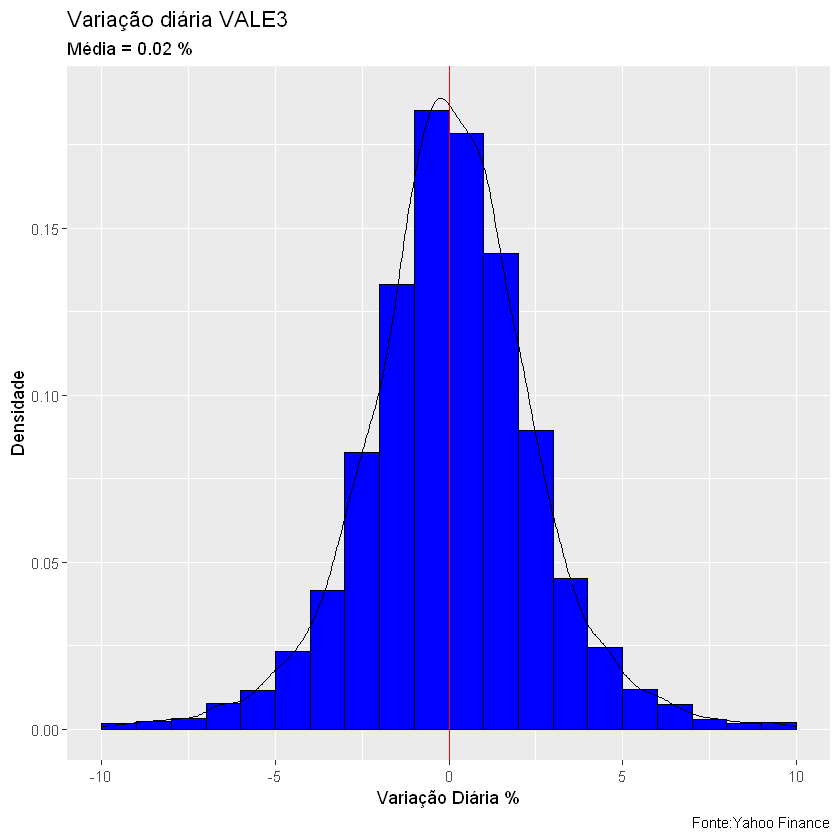

In [2]:
library(quantmod)
library(ggplot2)
petr <- getSymbols("VALE3.SA", src = "yahoo", from = "1998-02-01", to = "2020-06-12",
                   auto.assign = T)
petr <- na.omit(VALE3.SA)
var <- (diff(petr$VALE3.SA.Close,1)/petr$VALE3.SA.Close[1:length(petr$VALE3.SA.Close)-1])*100
var <- data.frame(VAR = var)
var <- var[-which(var == 0),]
var <- data.frame(var)
var <- na.omit(var)
ggplot(var,aes(var, after_stat(density)))+
  geom_histogram(binwidth = 0.01, fill = "blue",
                 colour = "black", breaks = c(-20:20))+
  labs(x = "Variação Diária %", y = "Densidade", title = "Variação diária VALE3",
        caption = "Fonte:Yahoo Finance",
       subtitle = paste("Média =",round(mean(var$var),3),"%"))+
  geom_vline(xintercept = mean(var$var), colour = "red")+
  geom_density()+
  xlim(c(-10,10))

In [3]:
round(quantile(var$var, probs = 0.05), 3)

5% 
-4.095